In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)


In [2]:
df = pd.read_csv("../data/masterdataframe.csv", index_col = 'Unnamed: 0')
df.head()


,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_item_id,product_id,seller_id,price,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,y_month
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,1,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,79.80,19.53,800.0,17.0,27.0,17.0,home_comfort,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,Minas Gerais,2018-04
1,d86305c284cecff56c7ee9d3fbd4f8d6,1,credit_card,4,93.72,0e37385834260d6111727103a93e790a,delivered,2018-04-15 22:53:59,1,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,79.80,13.92,800.0,17.0,27.0,17.0,home_comfort,550a1a0e8ad53e4147e6c761b5699c2b,14781,barretos,Sao Paulo,2018-04
2,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,1,a630cc320a8c872f9de830cf121661a3,eaf6d55068dea77334e8477d3878d89e,17.00,7.39,150.0,16.0,6.0,11.0,auto,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,Sao Paulo,2018-06
3,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,1,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,56.99,8.72,250.0,20.0,8.0,21.0,perfumery,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,Sao Paulo,2017-12
4,1966886b80f14d0588adf6406afb0026,1,debit_card,1,68.89,7238ed1e0d25683b9b65e1039e9d942b,invoiced,2017-08-22 16:01:44,1,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,56.99,11.90,250.0,20.0,8.0,21.0,perfumery,8a9a81879cbda02fa71d4addfb1a446c,37550,pouso alegre,Minas Gerais,2017-08


In [3]:
# Checking if there are any duplicates
df[df.duplicated()]

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_item_id,product_id,seller_id,price,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,y_month


In [4]:
print(len(df.customer_unique_id.unique()), len(df.customer_id.unique()))

94086 97254


In [5]:
len(df['customer_state'].unique())

27

In [6]:
df.columns

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_item_id', 'product_id', 'seller_id',
       'price', 'freight_value', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'y_month'],
      dtype='object')

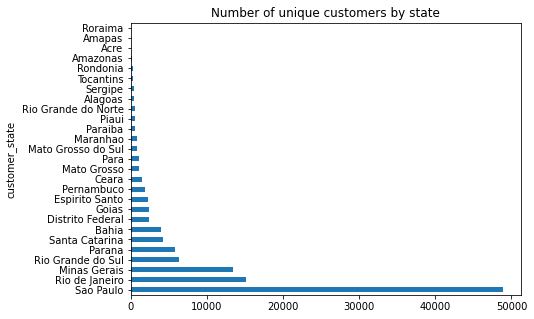

In [7]:
# Checking the number of unique customers by state
# The three states of Sao Paulo, Rio de Janeiro and Minas Gerais have most unique customers.
# Moreover, there are customers in all Brazilian states.

a = df.groupby('customer_state')['customer_unique_id'].count().sort_values( ascending=False)
a.plot(kind='barh', figsize = (7, 5), title='Number of unique customers by state')
plt.show()


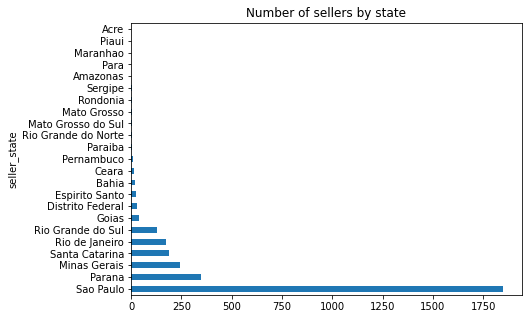

In [8]:
# Checking the location of sellers by state

sellers = pd.read_csv("../data/olist_sellers_dataset.csv")

dictionary = {'AC' : 'Acre', 'AL' : 'Alagoas', 'AP' : 'Amapas', 'AM' : 'Amazonas', 'BA':'Bahia',
              'CE':'Ceara', 'DF':'Distrito Federal', 'ES':'Espirito Santo', 'GO': 'Goias', 
              'MA': 'Maranhao', 'MT': 'Mato Grosso', 'MS':'Mato Grosso do Sul', 'MG':'Minas Gerais', 
              'PA':'Para', 'PB': 'Paraiba', 'PR': 'Parana', 'PE':'Pernambuco', 'PI': 'Piaui', 
              'RJ': 'Rio de Janeiro', 'RN':'Rio Grande do Norte', 'RS': 'Rio Grande do Sul', 
              'RO':'Rondonia', 'RR': 'Roraima', 'SC':'Santa Catarina', 'SP': 'Sao Paulo', 
              'SE':'Sergipe', 'TO':'Tocantins'} 

sellers['seller_state'] = sellers['seller_state'].map(dictionary)

b = sellers.groupby('seller_state')['seller_id'].count().sort_values( ascending=False)

b.plot(kind='barh', figsize = (7, 5), title='Number of sellers by state')
plt.show()


In [9]:
# Calculating additional columns

df['freight_price_ratio'] = df['freight_value']/df['price']

# Calculating product volume (dimensions), since there are several weight=0 rows, but 
# they containt valuable information in other columns.

df['product_volume'] = df['product_length_cm']*df['product_height_cm']*df['product_width_cm']

df['product_volume_freight_ratio'] = df['freight_value']/df['product_volume']


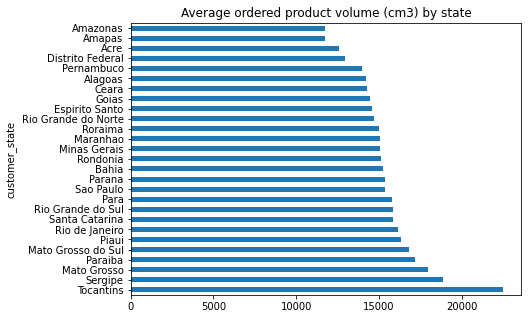

In [10]:
# Average ordered product volume (dimensions) by state
b = df.groupby('customer_state')['product_volume'].mean().sort_values( ascending=False)

b.plot(kind='barh', figsize = (7, 5), title='Average ordered product volume (cm3) by state')
plt.show()

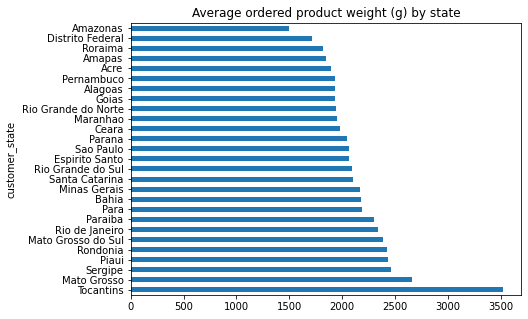

In [11]:
# Average ordered product weight by state
c = df.groupby('customer_state')['product_weight_g'].mean().sort_values(ascending=False)

c.plot(kind='barh', figsize = (7, 5), title='Average ordered product weight (g) by state')
plt.show()

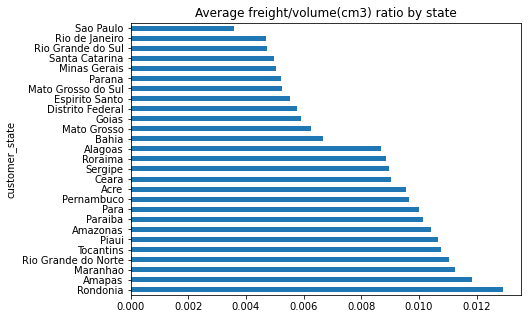

In [12]:
# Average freight/volume ratio 
d = df.groupby('customer_state')['product_volume_freight_ratio'].mean().sort_values( ascending=False)

d.plot(kind='barh', figsize = (7, 5), title='Average freight/volume(cm3) ratio by state')
plt.show()


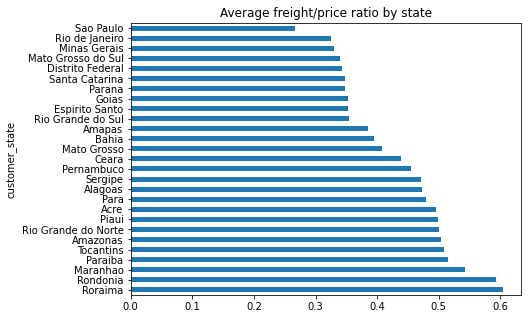

In [13]:
# Average freight/price ratio 
e = df.groupby('customer_state')['freight_price_ratio'].mean().sort_values( ascending=False)

e.plot(kind='barh', figsize = (7, 5), title='Average freight/price ratio by state')
plt.show()


In [14]:
# What are the 10 most popular product categories?

cat_10 = df.groupby('product_category_name_english')['order_id'].count().sort_values( ascending=False).head(10)

cat_10 = cat_10.index.values.tolist()
print(cat_10)


['bed_bath_table', 'health_beauty', 'furniture', 'sports_leisure', 'computers_accessories', 'housewares', 'watches_gifts', 'telephony', 'garden_tools', 'auto']


In [15]:
# Importing economic indicators
indic = pd.read_csv("../data/indicators.csv", index_col ="Unnamed: 0")
indic

,TIME,BCI,CCI,CPI_clothing_index,retail_trade_index,labour_earnings_index
0,2016-09,98.70613,98.96696,105.879462,91.889537,111.043845
1,2016-10,98.69373,98.93486,106.355871,92.307692,111.916681
2,2016-11,98.63857,98.76029,106.568635,91.784999,112.638934
3,2016-12,98.63148,98.63354,106.909753,91.262305,113.421877
4,2017-01,98.75282,98.78220,106.524695,95.025699,114.404617
5,2017-02,98.88799,99.04888,106.386321,95.443854,115.078071
6,2017-03,99.04408,99.29156,106.258739,93.457618,115.799336
7,2017-04,99.13255,99.40447,106.768681,95.443854,113.784860
8,2017-05,99.14164,99.45454,107.815160,95.652931,114.264190
9,2017-06,99.10270,99.42467,108.041416,97.011935,114.781795


In [16]:
# Total received payments per month

payments_month = df.groupby(['y_month'])['payment_value'].sum().reset_index()
payments_month 

# Merge with indicator dataframe

indic_payments = pd.merge(indic, payments_month, how='left', left_on='TIME', right_on='y_month')
indic_payments


,TIME,BCI,CCI,CPI_clothing_index,retail_trade_index,labour_earnings_index,y_month,payment_value
0,2016-09,98.70613,98.96696,105.879462,91.889537,111.043845,2016-09,347.52
1,2016-10,98.69373,98.93486,106.355871,92.307692,111.916681,2016-10,73818.66
2,2016-11,98.63857,98.76029,106.568635,91.784999,112.638934,NaN,NaN
3,2016-12,98.63148,98.63354,106.909753,91.262305,113.421877,2016-12,19.62
4,2017-01,98.75282,98.78220,106.524695,95.025699,114.404617,2017-01,183772.92
5,2017-02,98.88799,99.04888,106.386321,95.443854,115.078071,2017-02,333177.09
6,2017-03,99.04408,99.29156,106.258739,93.457618,115.799336,2017-03,517484.65
7,2017-04,99.13255,99.40447,106.768681,95.443854,113.784860,2017-04,493438.43
8,2017-05,99.14164,99.45454,107.815160,95.652931,114.264190,2017-05,710111.02
9,2017-06,99.10270,99.42467,108.041416,97.011935,114.781795,2017-06,592032.94


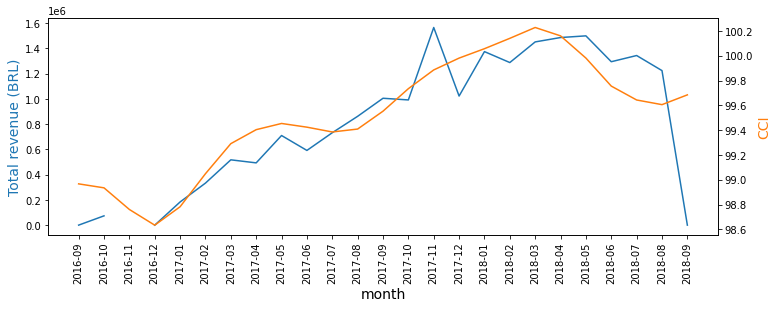

In [45]:
# Total payments - CCI 

# Create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(12, 4))

# Make a plot
ax.plot(indic_payments.TIME, indic_payments.payment_value, color="#1f77b4")
ax.set_xlabel("month",fontsize=14)
ax.set_ylabel("Total revenue (BRL)",color="#1f77b4", fontsize=14)

# Twin object for two different y-axis on the sample plot
ax2=ax.twinx()
ax2.plot(indic_payments.TIME, indic_payments.CCI, color="#ff7f0e")
ax2.set_ylabel("CCI", color="#ff7f0e", fontsize=14)

ax.tick_params(axis='x', labelrotation=90)

plt.show()


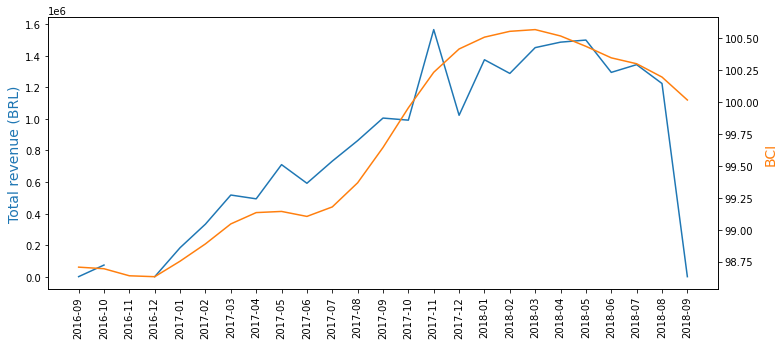

In [18]:
# Total payments - BCI

# Create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(12, 5))

# Make a plot
ax.plot(indic_payments.TIME, indic_payments.payment_value, color="#1f77b4")
# ax.set_xlabel("month",fontsize=14)
ax.set_ylabel("Total revenue (BRL)",color="#1f77b4", fontsize=14)

# Twin object for two different y-axis on the sample plot
ax2=ax.twinx()
ax2.plot(indic_payments.TIME, indic_payments.BCI, color="#ff7f0e")
ax2.set_ylabel("BCI", color="#ff7f0e", fontsize=14)

ax.tick_params(axis='x', labelrotation=90)

plt.show()


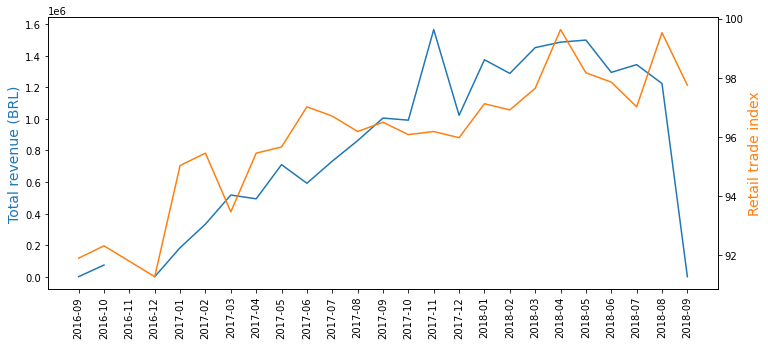

In [19]:
# Total payments - retail_trade_index

# Create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(12, 5))

# Make a plot
ax.plot(indic_payments.TIME, indic_payments.payment_value, color="#1f77b4")
# ax.set_xlabel("month",fontsize=14)
ax.set_ylabel("Total revenue (BRL)",color="#1f77b4", fontsize=14)

# Twin object for two different y-axis on the sample plot
ax2=ax.twinx()
ax2.plot(indic_payments.TIME, indic_payments.retail_trade_index, color="#ff7f0e")
ax2.set_ylabel("Retail trade index", color="#ff7f0e", fontsize=14)

ax.tick_params(axis='x', labelrotation=90)

plt.show()


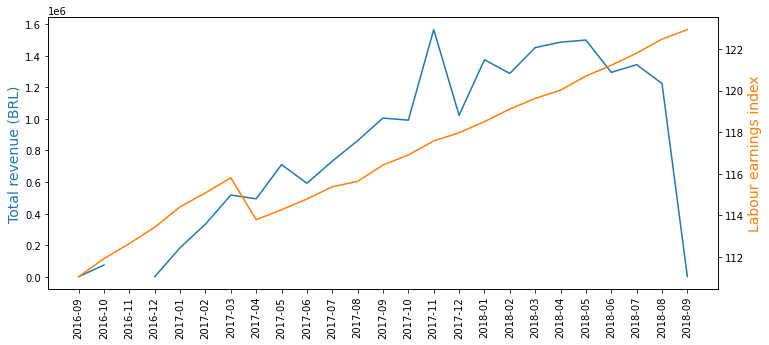

In [20]:
# Total payments - labour_earnings_index

# Create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(12, 5))

# Make a plot
ax.plot(indic_payments.TIME, indic_payments.payment_value, color="#1f77b4")
# ax.set_xlabel("month",fontsize=14)
ax.set_ylabel("Total revenue (BRL)",color="#1f77b4", fontsize=14)

# Twin object for two different y-axis on the sample plot
ax2=ax.twinx()
ax2.plot(indic_payments.TIME, indic_payments.labour_earnings_index, color="#ff7f0e")
ax2.set_ylabel("Labour earnings index", color="#ff7f0e", fontsize=14)

ax.tick_params(axis='x', labelrotation=90)

plt.show()


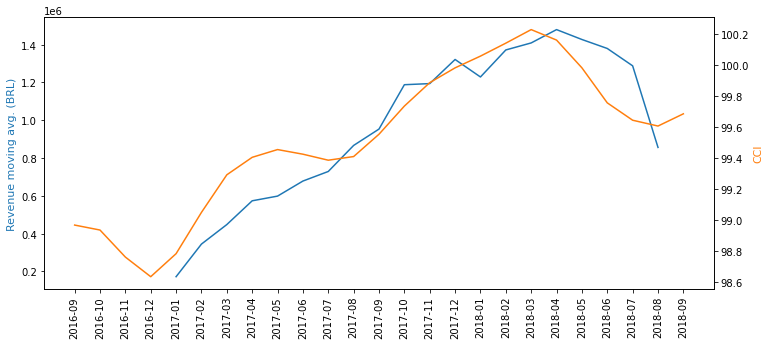

In [21]:
# Calculate 3 months moving average of total payments

numbers = list(indic_payments.payment_value)
window_size = 3

numbers_series = pd.Series(numbers)
windows = numbers_series.rolling(window_size)
moving_averages = windows.mean()

moving_averages_list = moving_averages.tolist()
without_nans = moving_averages_list[window_size - 1:]

tot_moving_avg = [None] + without_nans + [None]

indic_payments['tot_moving_avg'] = tot_moving_avg

# Plotting with CCI

# Create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(12, 5))

# Make a plot
ax.plot(indic_payments.TIME, indic_payments.tot_moving_avg, color="#1f77b4")
# ax.set_xlabel("month",fontsize=14)
ax.set_ylabel("Revenue moving avg. (BRL)",color="#1f77b4", fontsize=11)

# Twin object for two different y-axis on the sample plot
ax2=ax.twinx()
ax2.plot(indic_payments.TIME, indic_payments.CCI, color="#ff7f0e")
ax2.set_ylabel("CCI", color="#ff7f0e", fontsize=11)

ax.tick_params(axis='x', labelrotation=90)

plt.show()


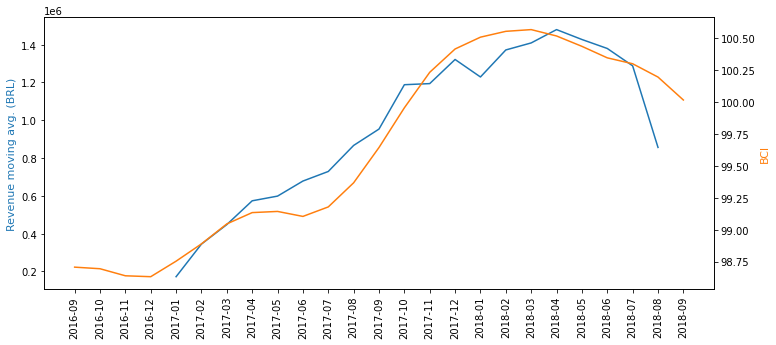

In [22]:
# Plotting with BCI

# Create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(12, 5))

# Make a plot
ax.plot(indic_payments.TIME, indic_payments.tot_moving_avg, color="#1f77b4")
# ax.set_xlabel("month",fontsize=14)
ax.set_ylabel("Revenue moving avg. (BRL)",color="#1f77b4", fontsize=11)

# Twin object for two different y-axis on the sample plot
ax2=ax.twinx()
ax2.plot(indic_payments.TIME, indic_payments.BCI, color="#ff7f0e")
ax2.set_ylabel("BCI", color="#ff7f0e", fontsize=11)

ax.tick_params(axis='x', labelrotation=90)

plt.show()

In [23]:
# Total received payments per month in each category

tot_payments_month_cat = pd.pivot_table(df, index=["y_month"], columns=["product_category_name_english"], values=["payment_value"], aggfunc=np.sum, fill_value=0)

# Pivot table to dataframe
# Remove top level
tot_payments_month_cat.columns = tot_payments_month_cat.columns.droplevel(0)
# Remove categories
tot_payments_month_cat.columns.name = None              
tot_payments_month_cat = tot_payments_month_cat.reset_index()

tot_payments_month_cat


,y_month,agro_industry_and_commerce,air_conditioning,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books,christmas_supplies,cine_photo,computers,computers_accessories,consoles_games,construction,cool_stuff,dvds_blu_ray,electronics,fashion,fixed_telephony,flowers,food_drink,furniture,garden_tools,health_beauty,home_comfort,housewares,industry_commerce_and_business,la_cuisine,luggage_accessories,market_place,music,musical_instruments,office_furniture,party_supplies,perfumery,pet_shop,security_and_services,small_appliances,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
0,2016-09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,272.46,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,75.06,0.00,0.00
1,2016-10,0.00,4675.43,0.00,183.03,2716.70,2495.42,2291.71,444.38,0.00,0.00,0.00,2396.70,4089.42,0.00,1335.41,0.00,1347.57,885.19,774.45,0.00,96.23,10852.54,1465.19,6062.16,0.00,2736.52,640.78,0.00,0.00,4955.87,0.00,0.00,1587.55,0.00,7201.84,775.86,0.00,0.00,3927.11,0.00,0.00,742.82,5670.74,3468.04
2,2016-12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19.62,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,2017-01,169.18,1103.79,0.00,0.00,9073.75,6554.26,6054.91,271.55,0.00,0.00,2217.99,6441.32,6772.31,335.00,12254.17,95.60,772.43,3169.65,1192.56,0.00,78.82,30188.42,21322.67,14485.80,2414.15,4517.62,0.00,0.00,704.28,548.22,37.24,357.74,3080.00,0.00,6281.85,1536.88,209.06,1788.25,17154.28,4709.73,0.00,3987.26,5581.35,8310.83
4,2017-02,331.10,3439.71,0.00,247.85,18792.88,4172.17,26219.52,1247.32,0.00,95.24,3602.47,15364.87,4637.96,2045.24,15018.17,36.94,2337.81,5843.40,2421.49,0.00,930.20,47532.92,18427.10,28661.58,2531.45,17103.60,134.94,0.00,2476.64,2815.54,0.00,2850.17,18086.23,0.00,9248.76,5271.48,0.00,8802.29,22996.62,2646.03,940.52,11636.38,11451.99,12778.51
5,2017-03,110.69,4541.62,320.84,1614.41,20396.70,4578.32,41668.27,5461.18,0.00,0.00,0.00,39904.18,11865.78,1321.18,24398.10,2028.79,5911.74,10352.30,4357.77,0.00,4518.13,50239.10,36553.18,32529.42,6278.85,25217.17,282.03,0.00,7937.66,2079.92,42.51,2241.23,23699.35,0.00,22233.00,11170.65,91.23,12033.13,37576.58,6994.89,587.91,12093.16,14887.56,29366.12
6,2017-04,0.00,3347.31,147.17,1508.51,24403.17,5559.98,36794.55,1297.03,93.97,166.31,0.00,26890.58,4263.66,2598.46,25090.45,1550.89,7198.38,8155.37,13436.37,0.00,2115.63,46506.14,36573.43,28791.49,6309.44,26320.55,0.00,63.25,9266.10,4538.03,88.84,4114.27,15113.84,0.00,23258.93,8662.46,183.65,24237.33,33201.73,5197.20,1770.73,10521.17,17390.17,26711.89
7,2017-05,1763.74,1400.79,7439.02,2333.19,29900.53,13239.76,46809.66,2824.01,0.00,91.71,0.00,83669.28,3288.40,3116.55,42194.34,150.60,8741.32,15266.79,624.96,0.00,1745.81,56601.37,27993.93,59743.51,15778.86,39775.48,552.22,232.19,16727.20,3267.52,0.00,10814.50,19260.31,0.00,25549.93,10507.39,1409.82,6217.03,54040.29,7700.51,1914.87,14847.14,27539.53,45036.96
8,2017-06,1422.05,3631.02,2363.99,1818.24,36693.52,11930.41,50329.08,3082.13,341.89,112.91,0.00,58864.94,6313.69,1987.90,43458.03,199.74,2929.16,13168.14,1148.48,0.00,323.77,43830.62,21336.34,42894.28,15745.03,39297.63,342.17,0.00,10525.01,1645.84,1141.12,6647.38,11776.80,0.00,29523.84,6886.69,345.40,10430.93,43500.87,4339.88,679.17,9839.53,19226.52,31958.80
9,2017-07,1199.47,1493.13,570.46,1304.83,19555.25,20141.29,101051.68,2222.15,98.05,0.00,0.00,71824.30,6897.93,2247.26,44961.65,830.99,12328.07,10799.21,421.33,0.00,1794.54,58897.42,31495.53,49585.80,14636.97,36981.29,352.25,559.23,10989.08,1860.25,350.54,9893.18,29612.10,83.41,16553.98,11649.29,1058.69,6228.21,58941.95,9387.90,219.63,11942.64,29233.06,41946.39


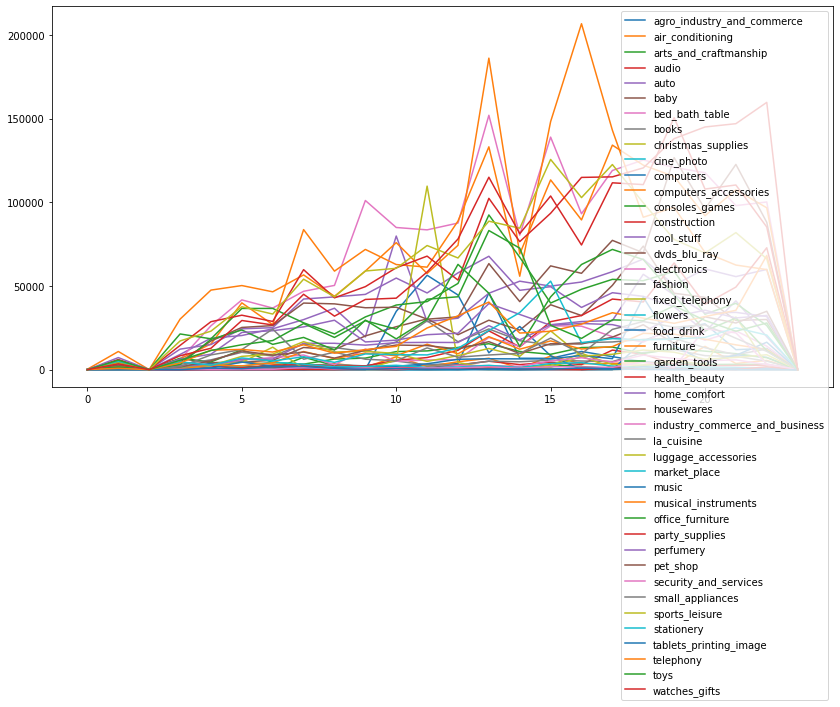

In [24]:
# Note that there is no data for 2016-11
# It seems that sales of some product categories follow seasonal trends.

tot_payments_month_cat.plot(figsize = (14, 7))
plt.show()


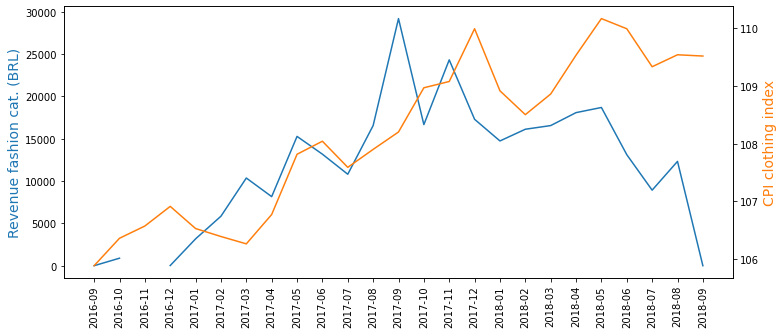

In [25]:
# Total monthly payments in fashion category vs clothing prices inflation

tot_payments_month_fashion = tot_payments_month_cat[['y_month', 'fashion']]

indic_fashion = pd.merge(indic, tot_payments_month_fashion, how='left', left_on='TIME', right_on='y_month')

# Create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(12, 5))

# Make a plot
ax.plot(indic_fashion.TIME, indic_fashion.fashion, color="#1f77b4")
# ax.set_xlabel("month",fontsize=14)
ax.set_ylabel("Revenue fashion cat. (BRL)",color="#1f77b4", fontsize=14)

# Twin object for two different y-axis on the sample plot
ax2=ax.twinx()
ax2.plot(indic_fashion.TIME, indic_fashion.CPI_clothing_index, color="#ff7f0e")
ax2.set_ylabel("CPI clothing index", color="#ff7f0e", fontsize=14)

ax.tick_params(axis='x', labelrotation=90)
plt.show()


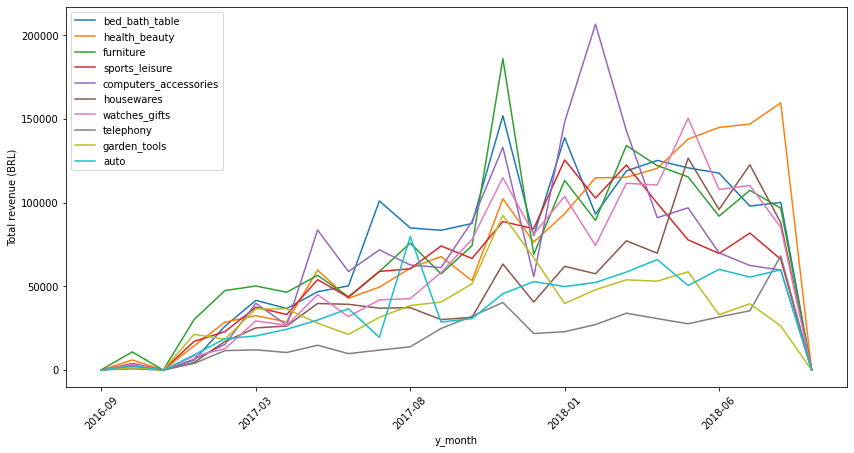

In [26]:
# Plotting total payments of the 10 most popular categories

cols = ['y_month']+cat_10

tot_payments_month_cat_10 = tot_payments_month_cat[cols]
# tot_payments_month_cat_10

ax = tot_payments_month_cat_10.plot(x='y_month', figsize = (14, 7))
ax.tick_params(axis='x', labelrotation=45)
ax.set_ylabel("Total revenue (BRL)")
plt.show()


In [27]:
# Merging dataframe with economic indicators
# I will leave only 10 most popular product categories (from cat_10 list)
 
indic_payments_cat = pd.merge(indic, tot_payments_month_cat, how='left', left_on='TIME', right_on='y_month')

indic_payments_cat

# Columns to keep in the dataframe
cols = ['TIME', 'BCI', 'CCI', 'CPI_clothing_index', 'retail_trade_index', 'labour_earnings_index']
cols = cols + cat_10

indic_payments_cat = indic_payments_cat[cols]
indic_payments_cat


,TIME,BCI,CCI,CPI_clothing_index,retail_trade_index,labour_earnings_index,bed_bath_table,health_beauty,furniture,sports_leisure,computers_accessories,housewares,watches_gifts,telephony,garden_tools,auto
0,2016-09,98.70613,98.96696,105.879462,91.889537,111.043845,0.00,0.00,272.46,0.00,0.00,0.00,0.00,75.06,0.00,0.00
1,2016-10,98.69373,98.93486,106.355871,92.307692,111.916681,2291.71,6062.16,10852.54,3927.11,2396.70,2736.52,3468.04,742.82,1465.19,2716.70
2,2016-11,98.63857,98.76029,106.568635,91.784999,112.638934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-12,98.63148,98.63354,106.909753,91.262305,113.421877,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,2017-01,98.75282,98.78220,106.524695,95.025699,114.404617,6054.91,14485.80,30188.42,17154.28,6441.32,4517.62,8310.83,3987.26,21322.67,9073.75
5,2017-02,98.88799,99.04888,106.386321,95.443854,115.078071,26219.52,28661.58,47532.92,22996.62,15364.87,17103.60,12778.51,11636.38,18427.10,18792.88
6,2017-03,99.04408,99.29156,106.258739,93.457618,115.799336,41668.27,32529.42,50239.10,37576.58,39904.18,25217.17,29366.12,12093.16,36553.18,20396.70
7,2017-04,99.13255,99.40447,106.768681,95.443854,113.784860,36794.55,28791.49,46506.14,33201.73,26890.58,26320.55,26711.89,10521.17,36573.43,24403.17
8,2017-05,99.14164,99.45454,107.815160,95.652931,114.264190,46809.66,59743.51,56601.37,54040.29,83669.28,39775.48,45036.96,14847.14,27993.93,29900.53
9,2017-06,99.10270,99.42467,108.041416,97.011935,114.781795,50329.08,42894.28,43830.62,43500.87,58864.94,39297.63,31958.80,9839.53,21336.34,36693.52


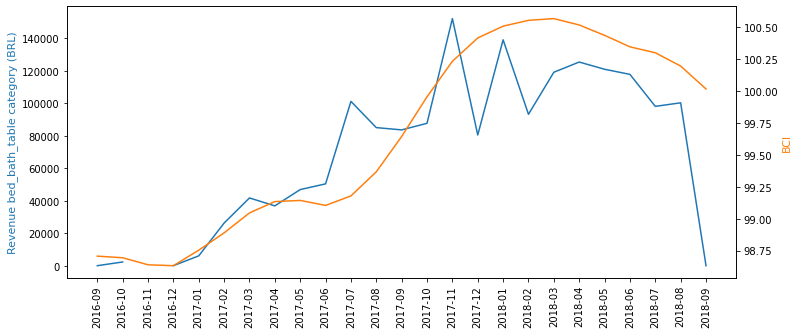

In [28]:
# Total payments in bed_bath_table category - BCI

# Create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(12, 5))

# Make a plot
ax.plot(indic_payments_cat.TIME, indic_payments_cat.bed_bath_table, color="#1f77b4")
# ax.set_xlabel("month",fontsize=14)
ax.set_ylabel("Revenue bed_bath_table category (BRL)",color="#1f77b4", fontsize=11)

# Twin object for two different y-axis on the sample plot
ax2=ax.twinx()
ax2.plot(indic_payments_cat.TIME, indic_payments_cat.BCI, color="#ff7f0e")
ax2.set_ylabel("BCI", color="#ff7f0e", fontsize=11)

ax.tick_params(axis='x', labelrotation=90)

plt.show()


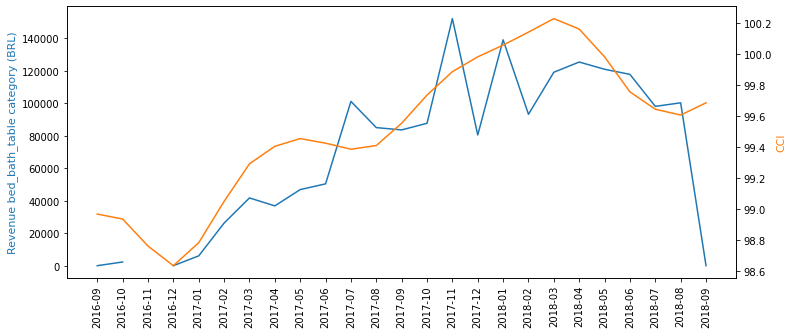

In [29]:
# Total payments in bed_bath_table category - CCI

# Create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(12, 5))

# Make a plot
ax.plot(indic_payments_cat.TIME, indic_payments_cat.bed_bath_table, color="#1f77b4")
# ax.set_xlabel("month",fontsize=14)
ax.set_ylabel("Revenue bed_bath_table category (BRL)",color="#1f77b4", fontsize=11)

# Twin object for two different y-axis on the sample plot
ax2=ax.twinx()
ax2.plot(indic_payments_cat.TIME, indic_payments_cat.CCI, color="#ff7f0e")
ax2.set_ylabel("CCI", color="#ff7f0e", fontsize=11)

ax.tick_params(axis='x', labelrotation=90)

plt.show()


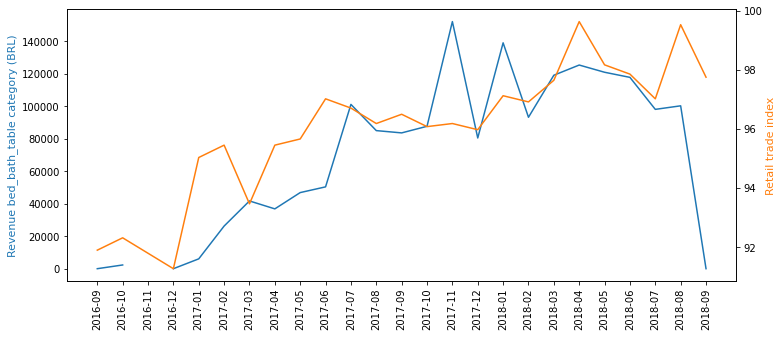

In [30]:
# Total payments in bed_bath_table category vs retail_trade_index

# Create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(12, 5))

# Make a plot
ax.plot(indic_payments_cat.TIME, indic_payments_cat.bed_bath_table, color="#1f77b4")
# ax.set_xlabel("month",fontsize=14)
ax.set_ylabel("Revenue bed_bath_table category (BRL)",color="#1f77b4", fontsize=11)

# Twin object for two different y-axis on the sample plot
ax2=ax.twinx()
ax2.plot(indic_payments_cat.TIME, indic_payments_cat.retail_trade_index, color="#ff7f0e")
ax2.set_ylabel("Retail trade index", color="#ff7f0e", fontsize=11)

ax.tick_params(axis='x', labelrotation=90)

plt.show()

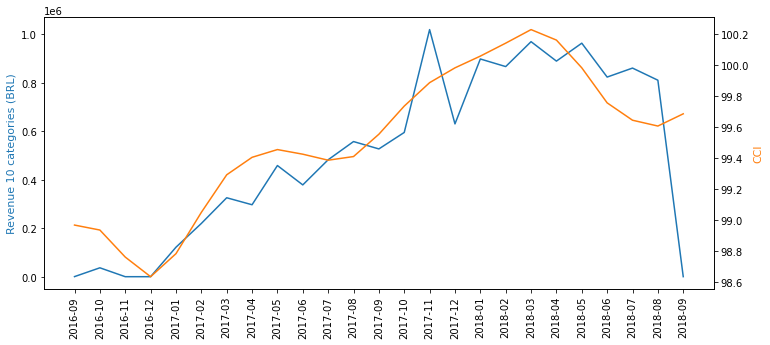

In [31]:
# Total payments in ten most popular categories
cols = cat_10
# indic_payments_cat.head()

indic_payments_cat['total_cat_10'] = indic_payments_cat[cols].sum(axis=1)

# indic_payments_cat.head()

# Create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(12, 5))

# Make a plot
ax.plot(indic_payments_cat.TIME, indic_payments_cat.total_cat_10, color="#1f77b4")
# ax.set_xlabel("month",fontsize=14)
ax.set_ylabel("Revenue 10 categories (BRL)",color="#1f77b4", fontsize=11)

# Twin object for two different y-axis on the sample plot
ax2=ax.twinx()
ax2.plot(indic_payments_cat.TIME, indic_payments_cat.CCI, color="#ff7f0e")
ax2.set_ylabel("CCI", color="#ff7f0e", fontsize=11)

ax.tick_params(axis='x', labelrotation=90)

plt.show()


Moving average total top 10 correlations with BCI and CCI
0.9665986684997394
0.959339488419834


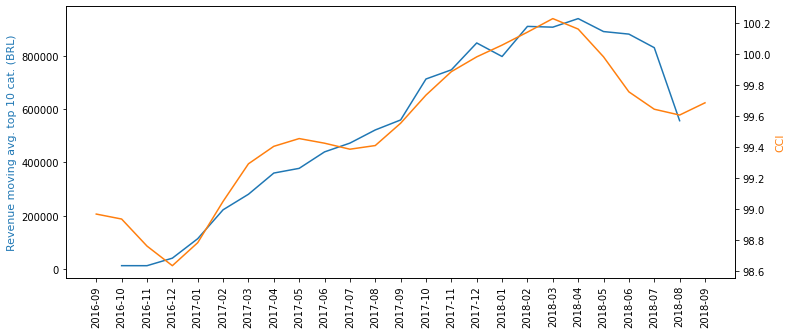

In [32]:
# Calculate 3 months moving average of payments for top 10 categories

numbers = list(indic_payments_cat['total_cat_10'])
window_size = 3

numbers_series = pd.Series(numbers)
windows = numbers_series.rolling(window_size)
moving_averages = windows.mean()

moving_averages_list = moving_averages.tolist()
without_nans = moving_averages_list[window_size - 1:]

tot_moving_avg = [None] + without_nans + [None]
indic_payments_cat['tot_moving_avg'] = tot_moving_avg
 
# Correlations
print('Moving average total top 10 correlations with BCI and CCI')
print(indic_payments_cat['tot_moving_avg'].corr(indic_payments_cat['BCI']))
print(indic_payments_cat['tot_moving_avg'].corr(indic_payments_cat['CCI']))

# Plotting with CCI

# Create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(12, 5))

# Make a plot
ax.plot(indic_payments_cat.TIME, indic_payments_cat.tot_moving_avg, color="#1f77b4")
# ax.set_xlabel("month",fontsize=14)
ax.set_ylabel("Revenue moving avg. top 10 cat. (BRL)",color="#1f77b4", fontsize=11)

# Twin object for two different y-axis on the sample plot
ax2=ax.twinx()
ax2.plot(indic_payments_cat.TIME, indic_payments_cat.CCI, color="#ff7f0e")
ax2.set_ylabel("CCI", color="#ff7f0e", fontsize=11)

ax.tick_params(axis='x', labelrotation=90)

plt.show()


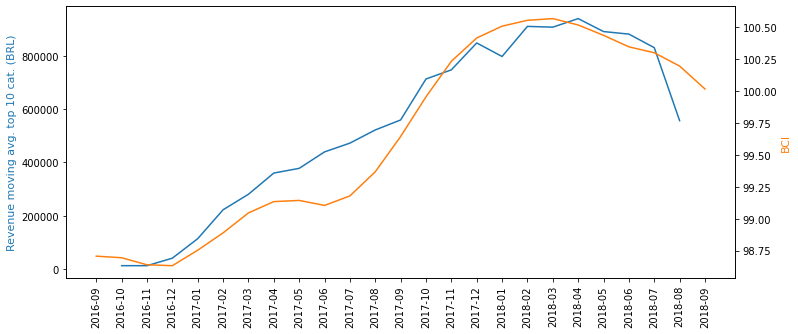

In [33]:
# Plotting with BCI

# Create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(12, 5))

# Make a plot
ax.plot(indic_payments_cat.TIME, indic_payments_cat.tot_moving_avg, color="#1f77b4")
# ax.set_xlabel("month",fontsize=14)
ax.set_ylabel("Revenue moving avg. top 10 cat. (BRL)",color="#1f77b4", fontsize=11)

# Twin object for two different y-axis on the sample plot
ax2=ax.twinx()
ax2.plot(indic_payments_cat.TIME, indic_payments_cat.BCI, color="#ff7f0e")
ax2.set_ylabel("BCI", color="#ff7f0e", fontsize=11)

ax.tick_params(axis='x', labelrotation=90)

plt.show()


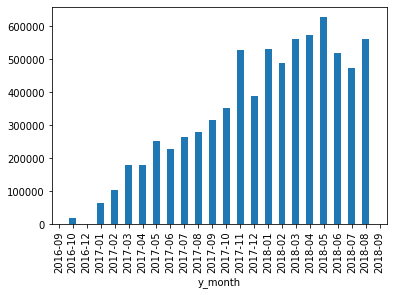

In [34]:
# Total received payments per month by state

tot_payments_month_state = pd.pivot_table(df, index=["y_month"], columns=["customer_state"], values=["payment_value"], aggfunc=np.sum, fill_value=0)

tot_payments_month_state

# Let's plot the data in the state with most customers
tot_payments_month_state.loc[ : , ('payment_value', "Sao Paulo")].plot(kind= 'bar')
plt.show()

In [35]:
# Pivot table to dataframe: total payments per month in each state

# remove top level
tot_payments_month_state.columns = tot_payments_month_state.columns.droplevel(0)
 #remove categories
tot_payments_month_state.columns.name = None              
tot_payments_month_state = tot_payments_month_state.reset_index()

tot_payments_month_state


,y_month,Acre,Alagoas,Amapas,Amazonas,Bahia,Ceara,Distrito Federal,Espirito Santo,Goias,Maranhao,Mato Grosso,Mato Grosso do Sul,Minas Gerais,Para,Paraiba,Parana,Pernambuco,Piaui,Rio Grande do Norte,Rio Grande do Sul,Rio de Janeiro,Rondonia,Roraima,Santa Catarina,Sao Paulo,Sergipe,Tocantins
0,2016-09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,75.06,0.00,0.00,272.46,0.00,0.00,0.00,0.00
1,2016-10,0.00,129.90,0.00,0.00,995.34,1949.78,1498.71,1067.14,1154.67,4124.85,604.07,0.00,6987.83,1804.49,74.74,5955.41,1688.49,246.09,1348.54,5498.35,13588.98,0.00,69.02,4834.53,19851.81,345.92,0.00
2,2016-12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19.62,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,2017-01,1657.33,748.78,0.00,0.00,5153.65,1266.13,2427.30,2492.58,15741.69,798.10,3346.92,170.36,26293.82,3764.09,463.13,8121.64,2151.93,1453.98,1268.13,13903.32,16903.97,825.51,0.00,8664.04,65097.88,381.78,676.86
4,2017-02,1289.08,2967.87,2003.80,1122.54,9629.05,2581.97,10951.56,6271.46,3159.27,1195.23,4128.18,8202.24,42135.70,8062.46,2544.30,29755.38,3525.48,3956.57,1101.25,19355.71,49467.19,4012.88,108.74,8883.53,102153.19,3672.91,939.55
5,2017-03,530.18,1421.50,667.93,1016.25,24444.17,7167.05,9871.97,7902.93,13865.31,3395.37,4758.53,8412.26,63146.96,12720.00,5343.89,23489.54,9965.96,3456.08,2104.60,27207.74,73182.94,3850.35,330.81,23980.10,180231.59,3976.33,1044.31
6,2017-04,1351.51,5536.25,0.00,1176.23,25230.20,7593.38,10528.76,7155.21,7950.18,4014.97,4834.01,2499.12,59278.22,6382.73,3828.80,22775.95,5491.43,2870.02,1957.45,34298.82,71857.47,1327.07,106.89,17427.95,179245.93,4488.95,4230.93
7,2017-05,2255.30,5827.13,1508.84,1321.68,26999.21,13123.79,10682.08,19599.78,17886.65,4552.62,8323.84,4381.43,67140.50,6570.70,3887.03,45955.84,15380.65,11823.54,6193.65,37834.41,100699.01,828.88,535.93,40832.54,251559.21,1207.87,3198.91
8,2017-06,510.27,1276.02,643.80,204.84,32053.03,11036.24,12938.76,13866.06,12460.21,2358.23,4892.50,5163.60,62779.18,6918.59,7894.33,34717.38,9472.69,2626.96,1527.78,42430.01,68746.34,2708.45,175.18,18612.83,229561.03,2170.89,4287.74
9,2017-07,794.40,3808.03,292.39,1845.58,26055.94,11829.49,20663.09,11533.33,11779.80,8573.74,14420.25,5290.69,80789.17,8206.60,11661.96,34616.09,17407.52,3610.57,4545.79,40821.02,115734.00,1428.64,225.01,29644.56,264722.95,1773.19,126.58


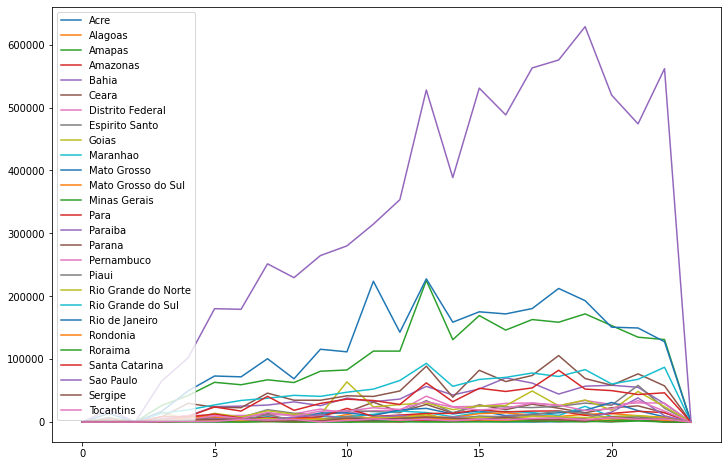

In [36]:
# Note that there is no data for 2016-11

tot_payments_month_state.plot( figsize = (12, 8))
plt.show()


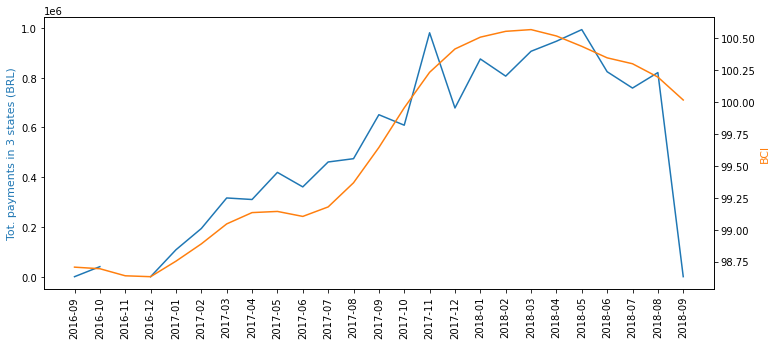

In [40]:
# Merging the dataframe and leaving just the 3 states with most customers

tot_payments_month_state['Total_3_states'] = tot_payments_month_state[['Sao Paulo', 'Rio de Janeiro', 'Minas Gerais']].sum(axis=1)

tot_payments_month_state['Total_3_states'].sum()/indic_payments.payment_value.sum()

tot_payments_month_state = tot_payments_month_state[['y_month', 'Total_3_states']]

indic_payments_state = pd.merge(indic, tot_payments_month_state, how='left', left_on='TIME', right_on='y_month')

# indic_payments_state.head()


# Plotting with BCI

# Create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(12, 5))

# Make a plot
ax.plot(indic_payments_state.TIME, indic_payments_state.Total_3_states, color="#1f77b4")
# ax.set_xlabel("month",fontsize=14)
ax.set_ylabel("Tot. payments in 3 states (BRL)",color="#1f77b4", fontsize=11)

# Twin object for two different y-axis on the sample plot
ax2=ax.twinx()
ax2.plot(indic_payments_state.TIME, indic_payments_state.BCI, color="#ff7f0e")
ax2.set_ylabel("BCI", color="#ff7f0e", fontsize=11)

ax.tick_params(axis='x', labelrotation=90)

plt.show()


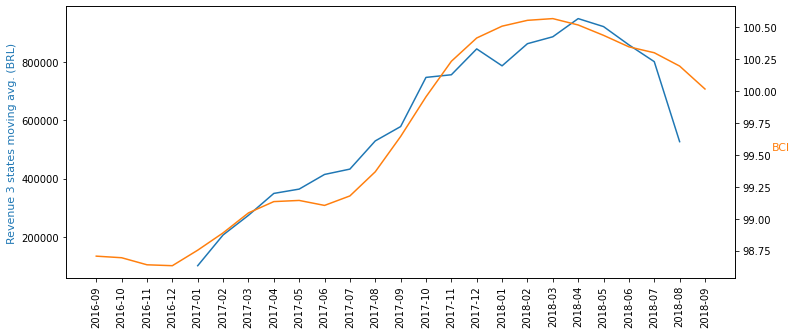

In [43]:
# 3 months moving average in 3 states with most orders

numbers = list(indic_payments_state['Total_3_states'])
window_size = 3

numbers_series = pd.Series(numbers)
windows = numbers_series.rolling(window_size)
moving_averages = windows.mean()

moving_averages_list = moving_averages.tolist()
without_nans = moving_averages_list[window_size - 1:]

tot_moving_avg = [None] + without_nans + [None]
indic_payments_state['tot_moving_avg'] = tot_moving_avg

# Plotting with BCI

from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.axes_divider import make_axes_area_auto_adjustable


# Create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(12, 5))

# Make a plot
ax.plot(indic_payments_state.TIME, indic_payments_state.tot_moving_avg, color="#1f77b4")
# ax.set_xlabel("month",fontsize=14)
ax.set_ylabel("Revenue 3 states moving avg. (BRL)",color="#1f77b4", fontsize=11)
# make_axes_area_auto_adjustable(ax)

# Twin object for two different y-axis on the sample plot
ax2=ax.twinx()
ax2.plot(indic_payments_state.TIME, indic_payments_state.BCI, color="#ff7f0e")
ax2.set_ylabel("BCI", color="#ff7f0e", fontsize=11, rotation=0)

ax.tick_params(axis='x', labelrotation=90)

plt.show()


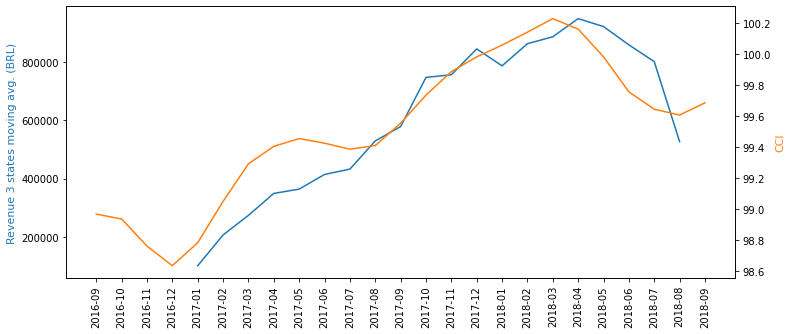

In [42]:
# Plotting with CCI

# Create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(12, 5))

# Make a plot
ax.plot(indic_payments_state.TIME, indic_payments_state.tot_moving_avg, color="#1f77b4")
# ax.set_xlabel("month",fontsize=14)
ax.set_ylabel("Revenue 3 states moving avg. (BRL)",color="#1f77b4", fontsize=11)

# Twin object for two different y-axis on the sample plot
ax2=ax.twinx()
ax2.plot(indic_payments_state.TIME, indic_payments_state.CCI, color="#ff7f0e")
ax2.set_ylabel("CCI", color="#ff7f0e", fontsize=11)

ax.tick_params(axis='x', labelrotation=90)

plt.show()


In [ ]:
# Average payment value per month

# avg_payment_per_month = df.groupby(['y_month'])['payment_value'].mean().reset_index()
# avg_payment_per_month.plot(x='y_month', y='payment_value', figsize = (12, 3))
# plt.show()


In [ ]:
# Total spending per customer during the analysed period

# a = df.groupby(['customer_unique_id'])['payment_value'].sum().reset_index()

# plt.figure(figsize=(12,4))
# sns.distplot(a['payment_value'], hist=False)
# plt.show()

In [46]:
# Marketing funnel file: companies applying for membership in Olist

funnel = pd.read_csv('../data/olist_closed_deals_dataset.csv')
funnel.head()

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,car_accessories,industry,eagle,NaN,NaN,NaN,reseller,NaN,0.0
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0
3,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-01-17 13:51:03,food_drink,online_small,NaN,NaN,NaN,NaN,reseller,NaN,0.0
4,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,home_appliances,industry,wolf,NaN,NaN,NaN,manufacturer,NaN,0.0


In [47]:
funnel.dtypes

mql_id                            object
seller_id                         object
sdr_id                            object
sr_id                             object
won_date                          object
business_segment                  object
lead_type                         object
lead_behaviour_profile            object
has_company                       object
has_gtin                          object
average_stock                     object
business_type                     object
declared_product_catalog_size    float64
declared_monthly_revenue         float64
dtype: object

In [51]:
# Changing to date type
funnel = funnel.apply(lambda x: pd.to_datetime(x, errors='coerce') if x.name in ['won_date'] else x)
funnel['y_month'] = funnel['won_date'].apply(lambda x: x.strftime('%Y-%m'))  
funnel.shape


(842, 15)

In [62]:
f = funnel.groupby('y_month')['seller_id'].count()
f

y_month
2017-12      3
2018-01     73
2018-02    113
2018-03    147
2018-04    207
2018-05    122
2018-06     57
2018-07     37
2018-08     33
2018-09     23
2018-10     21
2018-11      6
Name: seller_id, dtype: int64

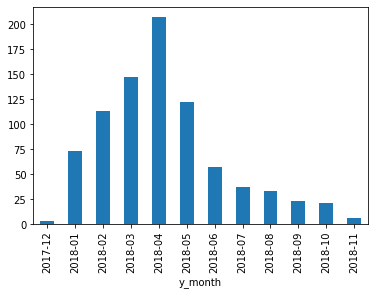

In [61]:
# 
f.plot(kind='bar')
plt.show()

In [71]:
print(funnel.groupby('business_segment')['seller_id'].count().sort_values(ascending=False))


business_segment
home_decor                         105
health_beauty                       93
car_accessories                     77
household_utilities                 71
construction_tools_house_garden     69
audio_video_electronics             64
computers                           34
pet                                 30
food_supplement                     28
food_drink                          26
sports_leisure                      25
bed_bath_table                      22
bags_backpacks                      22
toys                                20
fashion_accessories                 19
home_office_furniture               14
phone_mobile                        13
stationery                          13
small_appliances                    12
handcrafted                         12
baby                                10
books                                9
music_instruments                    9
watches                              8
jewerly                              8
home_app

In [72]:
print(funnel.groupby('business_type')['seller_id'].count().sort_values(ascending=False))


business_type
reseller        587
manufacturer    242
other             3
Name: seller_id, dtype: int64
